## Import and Load the Data

In [82]:
# import liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [83]:
# load the dataset

train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
# print full summary of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [86]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Plot to Understand the Data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

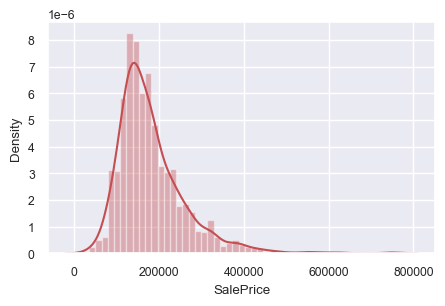

In [87]:
# plot histgram to see the distribution: 
# 1. deviate from normal distribution
# 2. psitive skewness

f, ax = plt.subplots(figsize=(5,3))
sns.distplot(train['SalePrice'], kde=True, color='r')

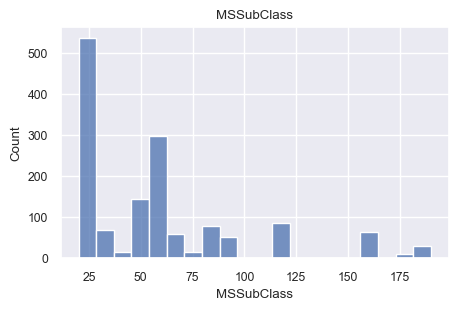

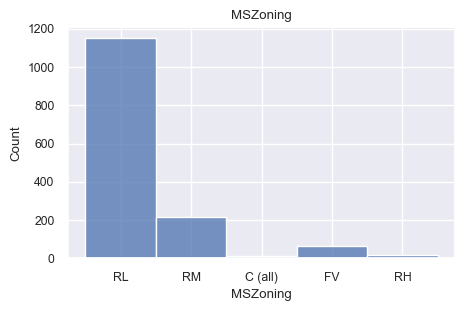

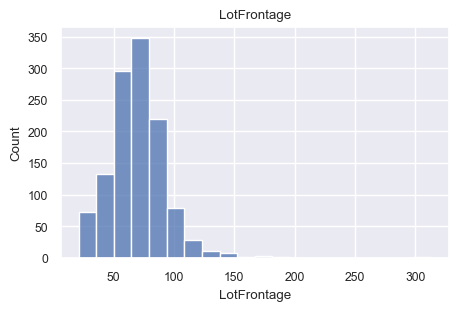

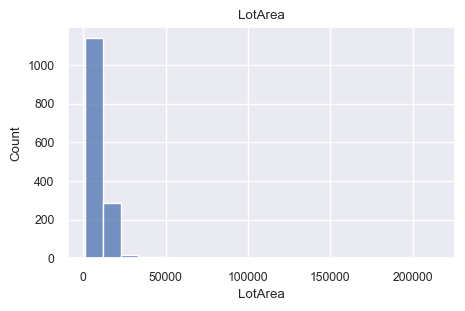

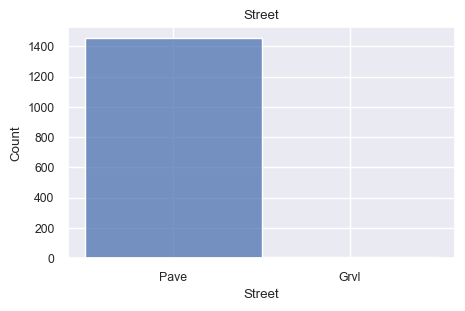

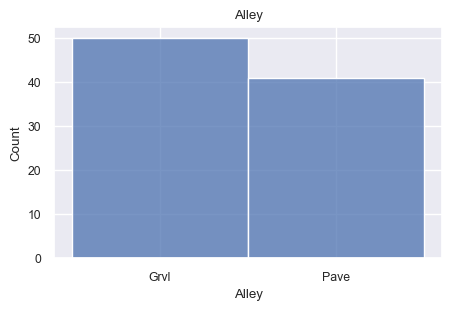

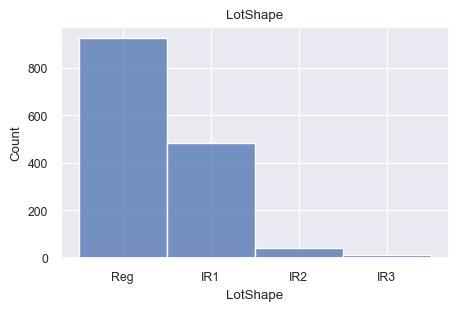

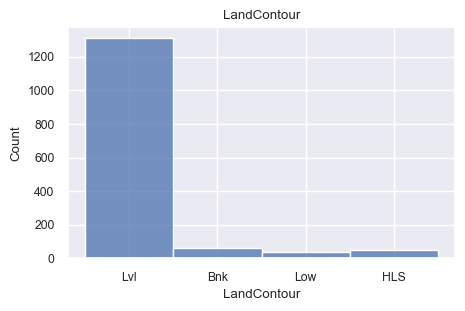

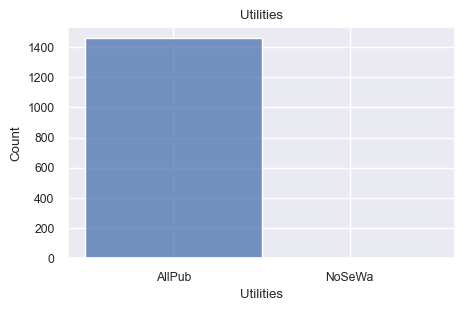

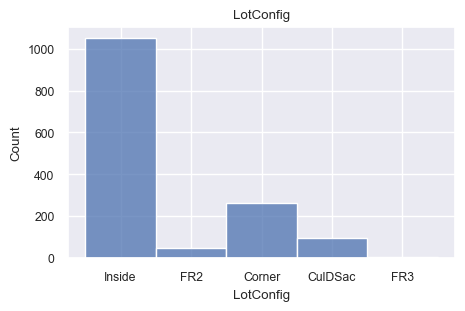

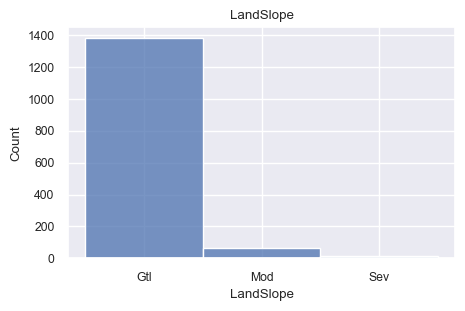

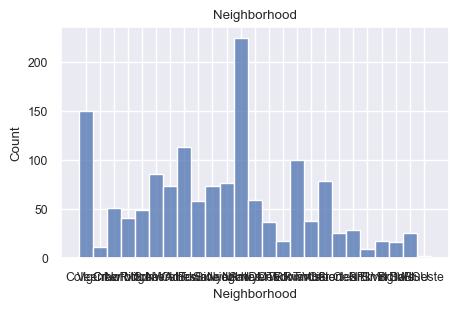

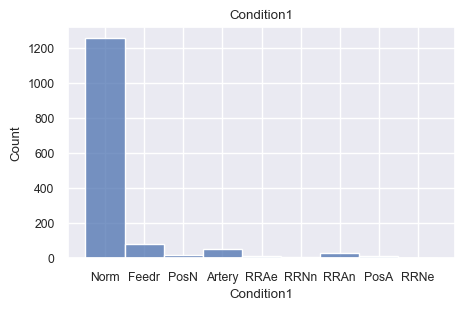

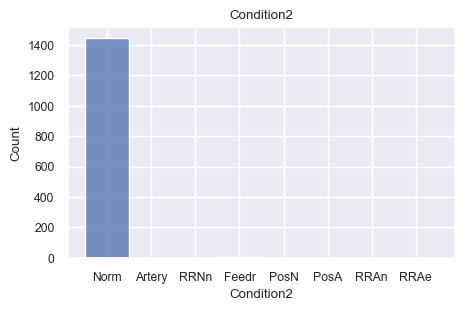

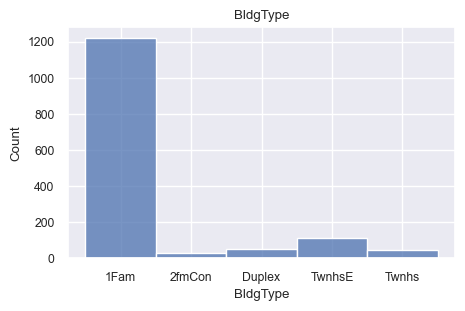

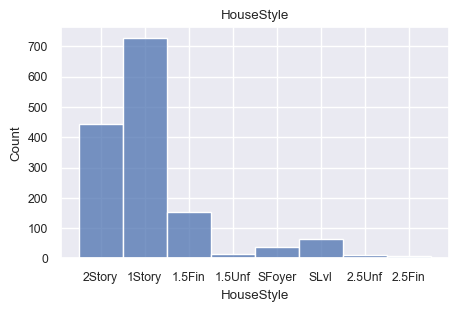

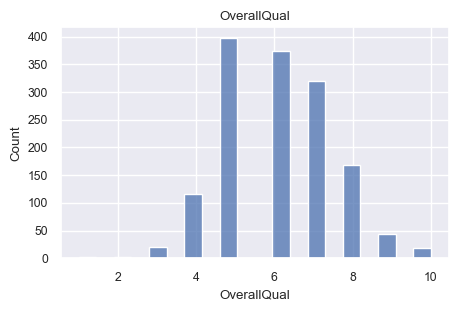

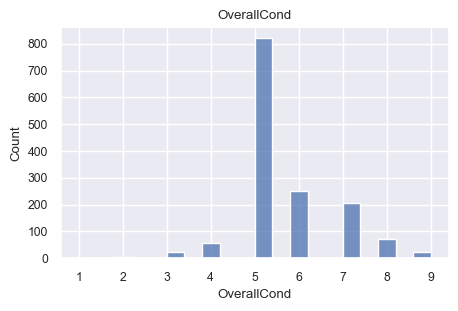

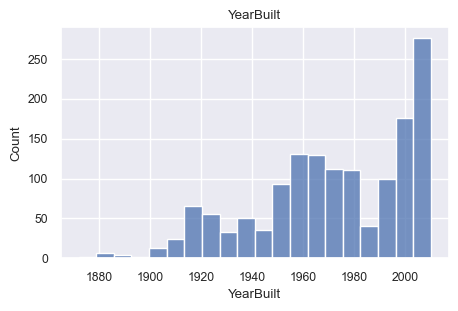

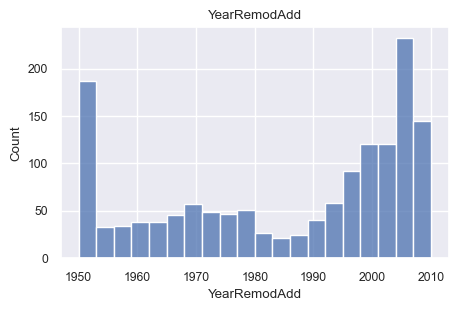

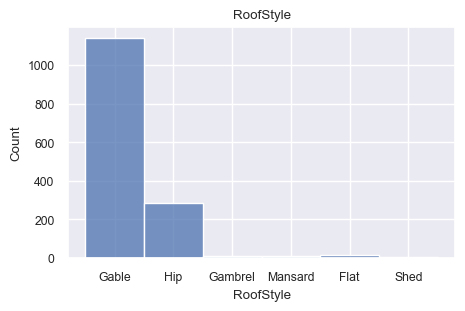

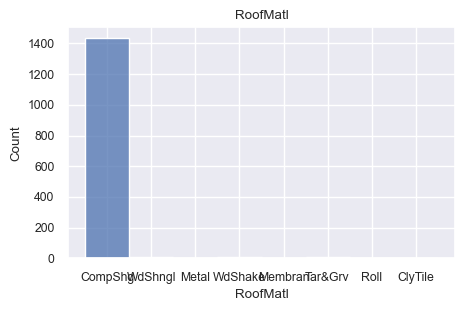

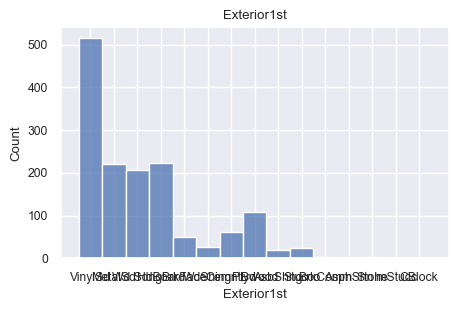

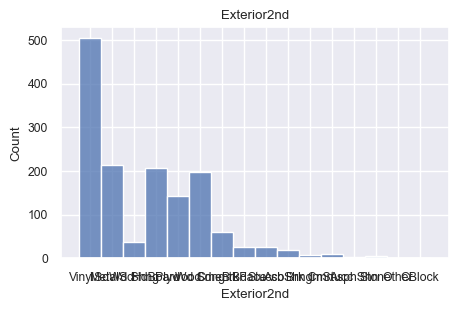

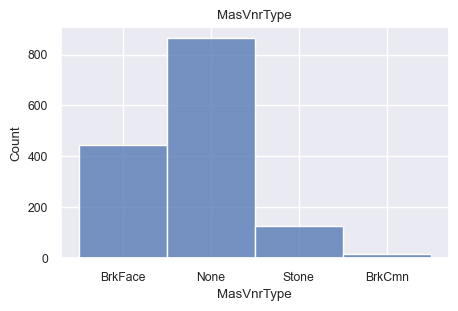

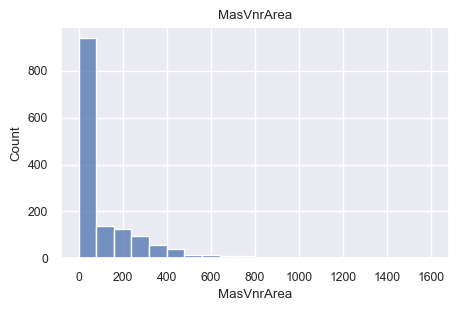

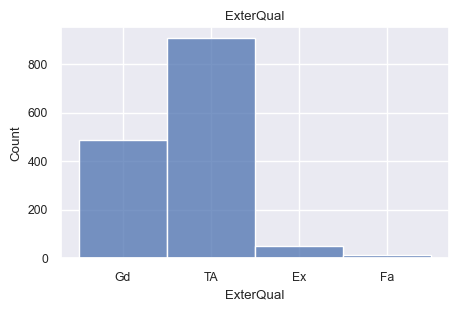

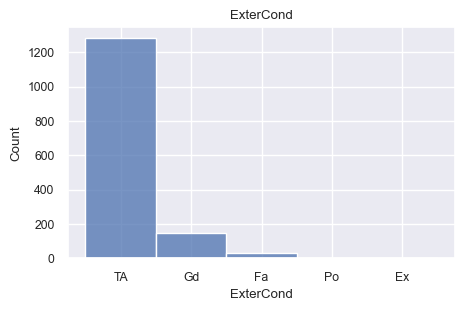

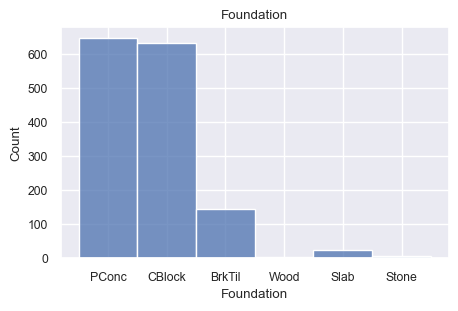

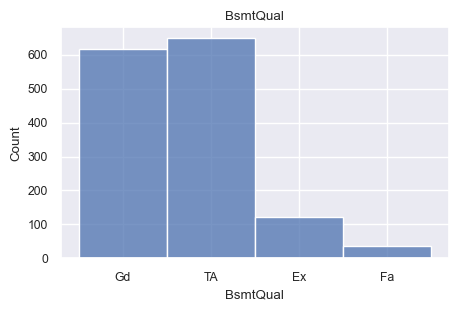

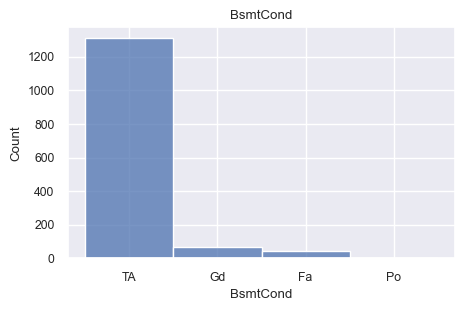

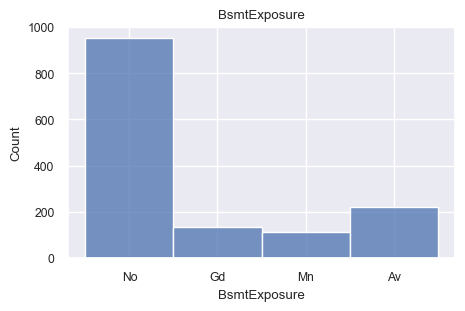

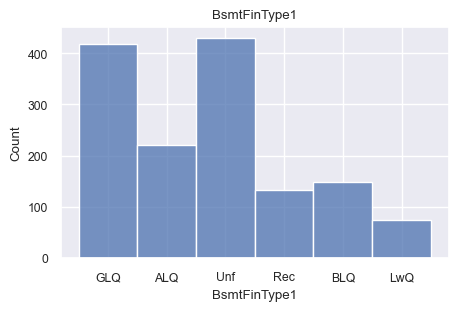

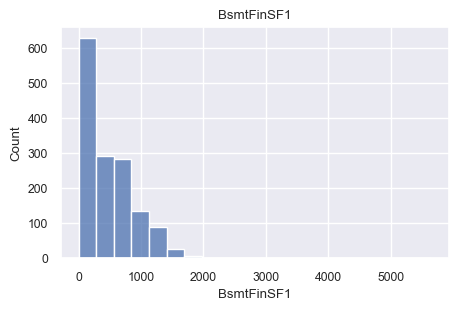

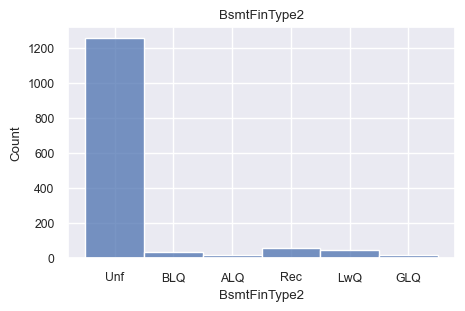

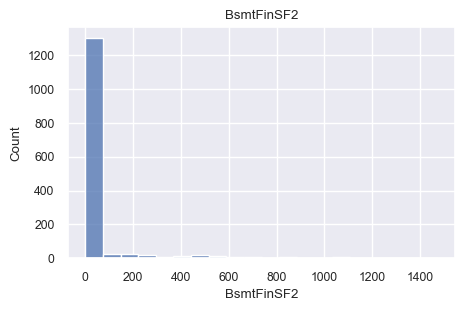

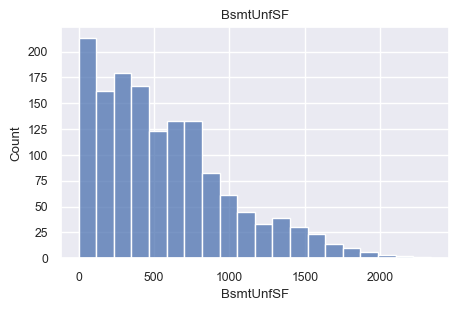

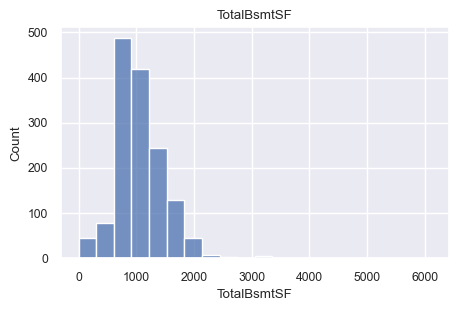

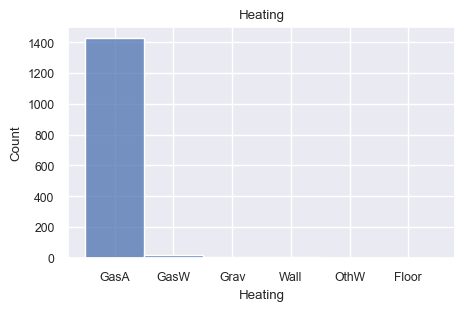

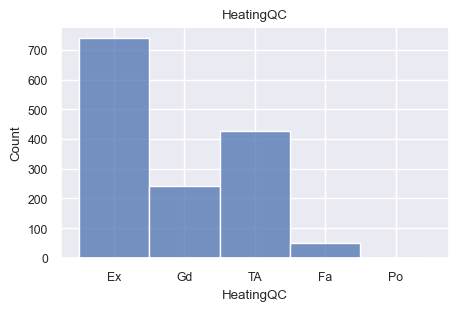

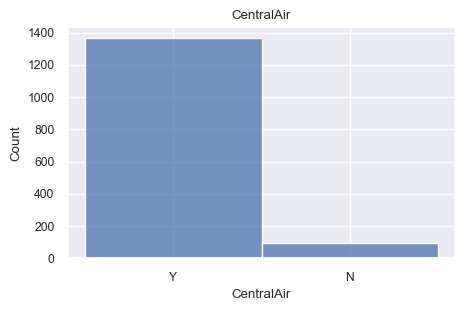

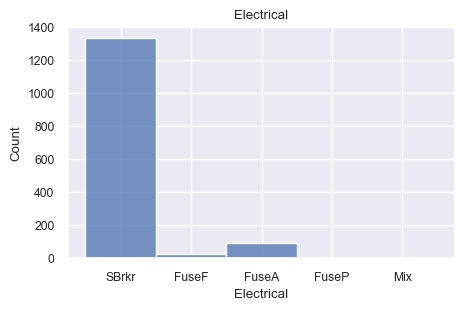

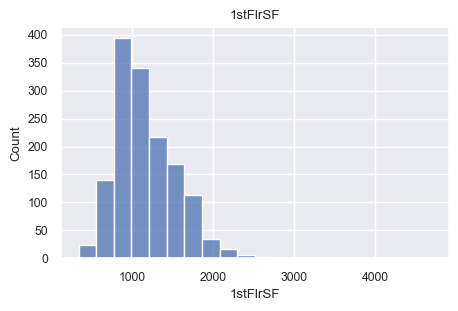

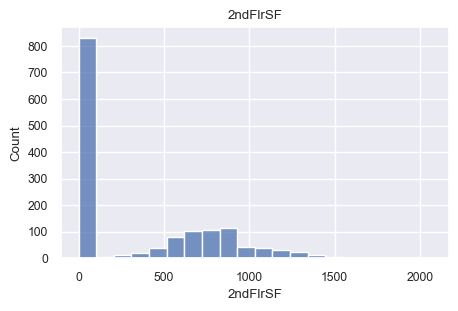

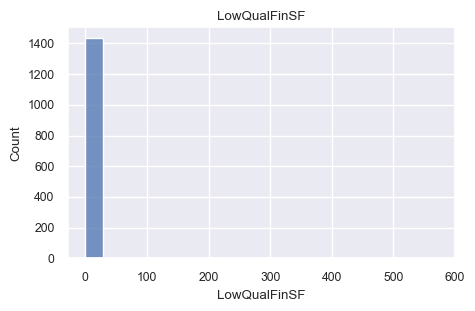

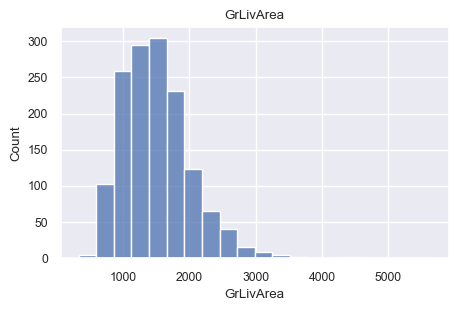

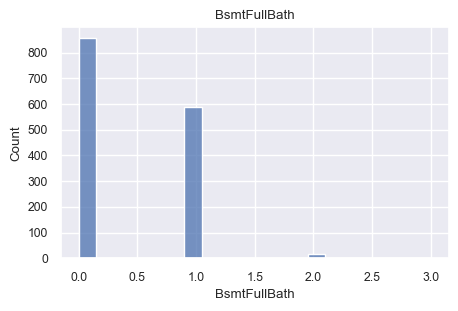

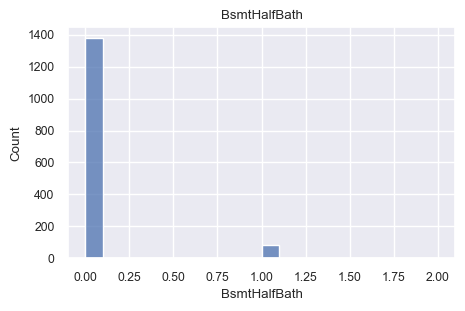

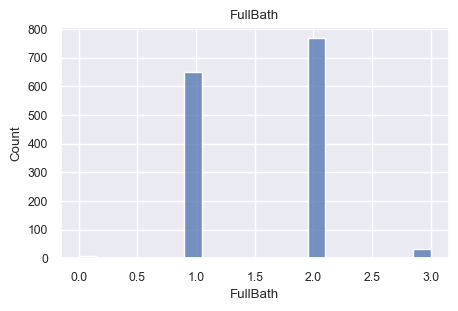

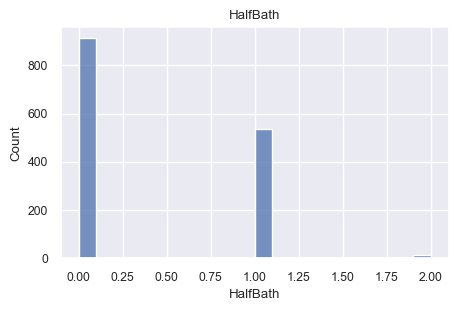

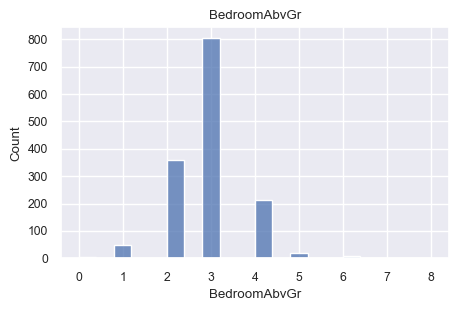

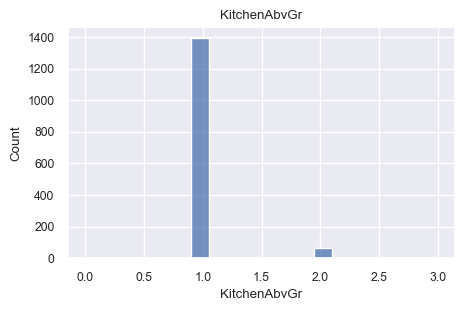

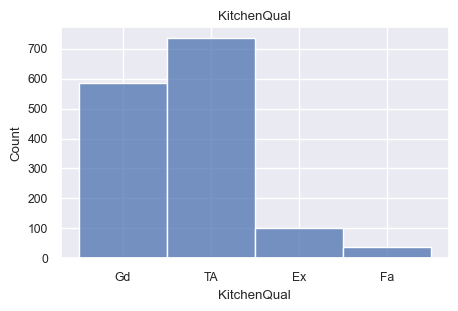

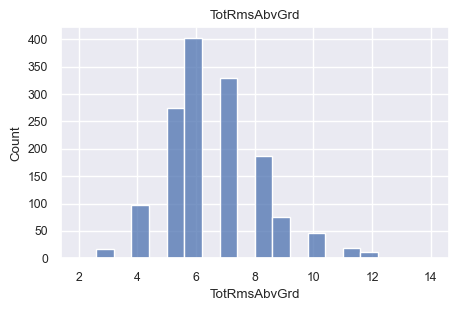

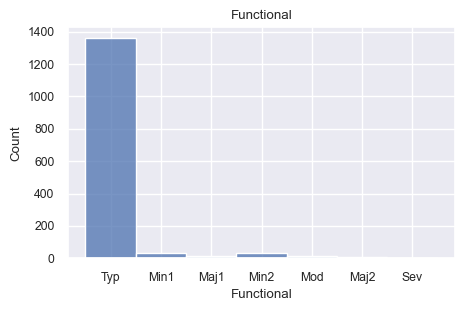

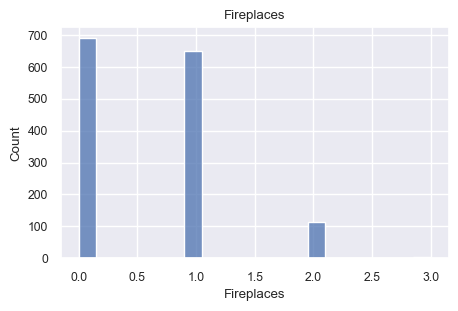

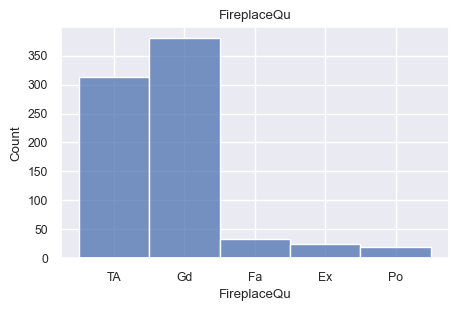

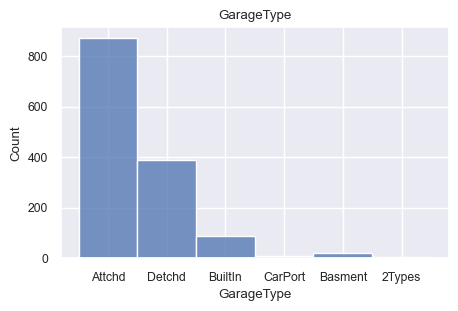

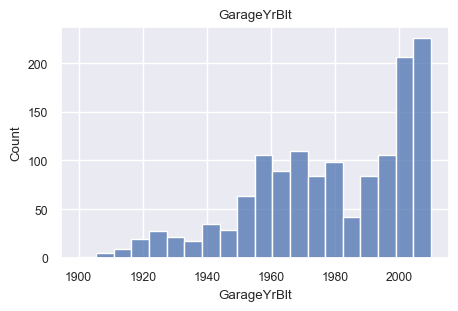

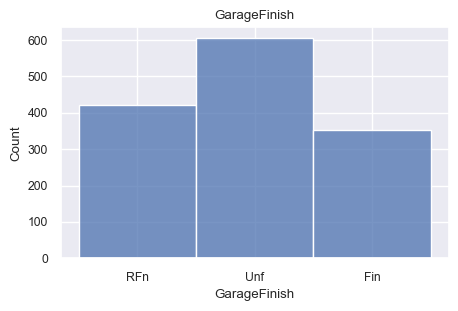

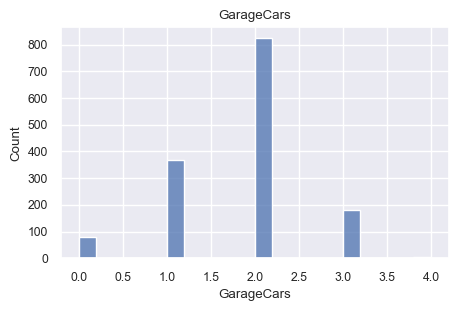

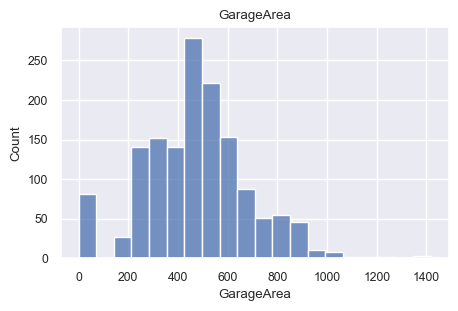

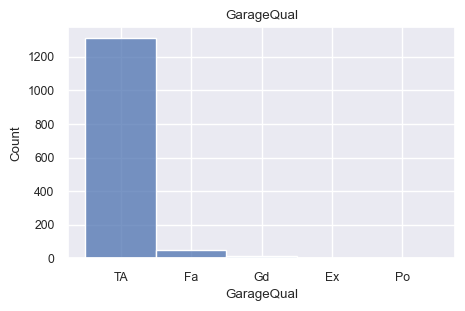

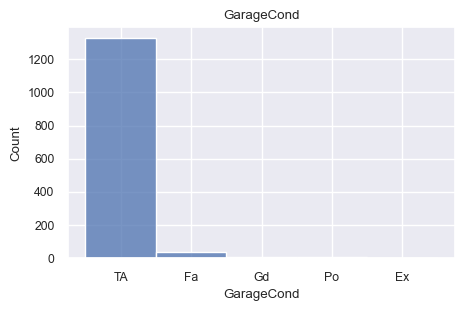

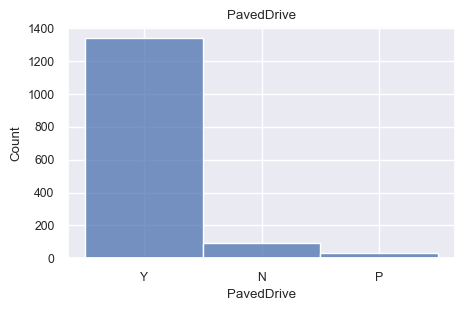

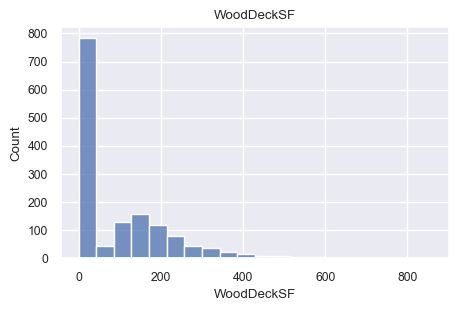

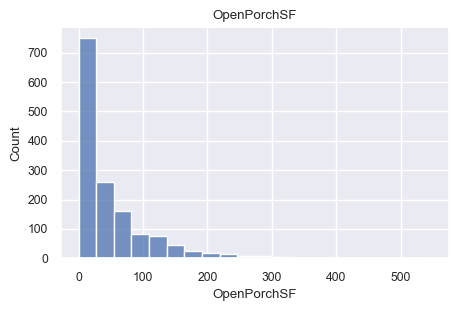

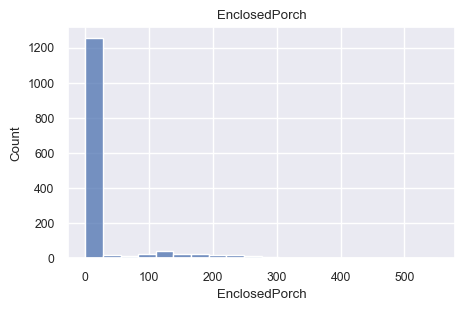

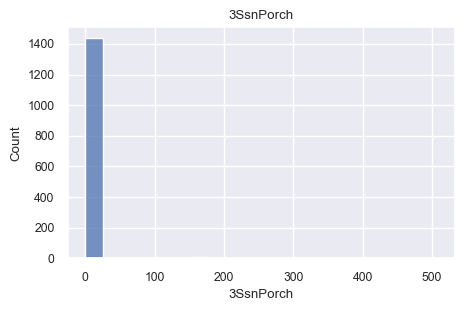

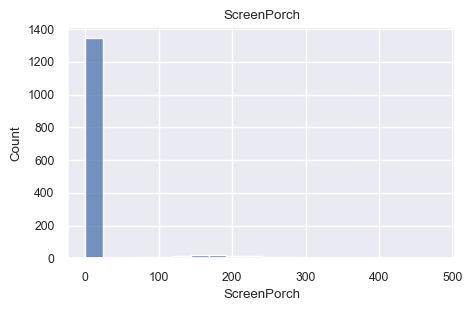

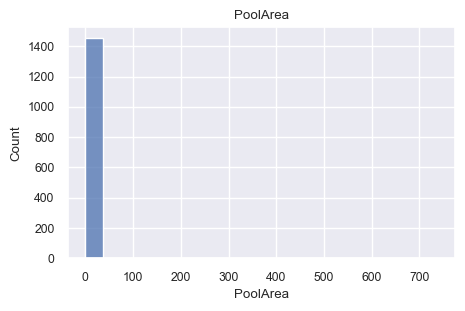

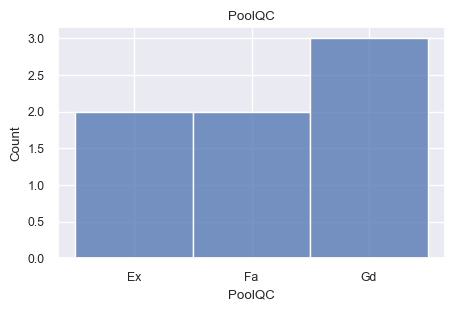

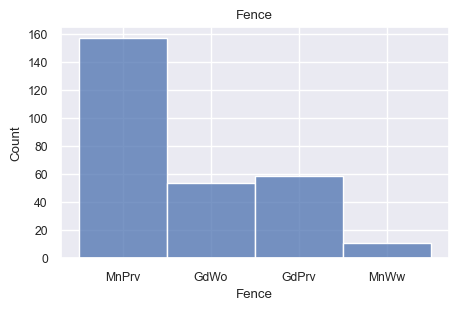

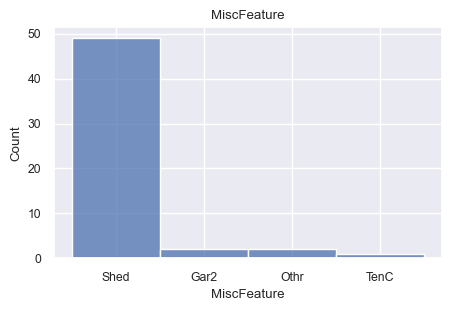

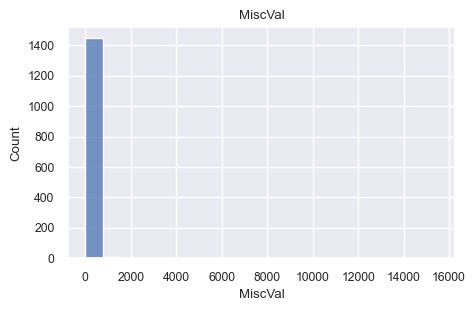

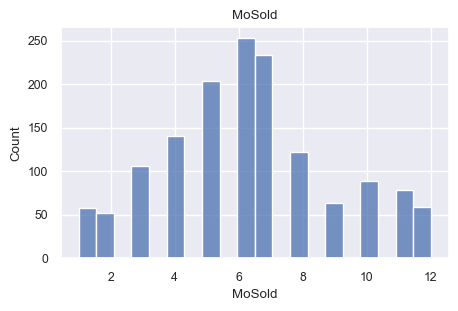

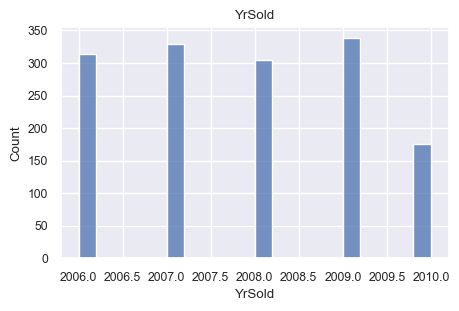

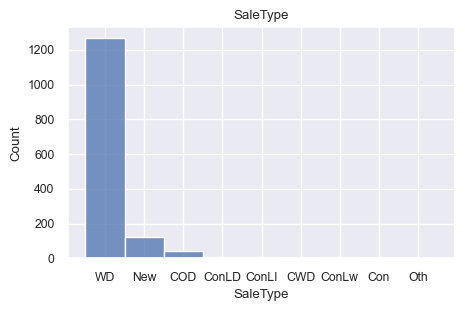

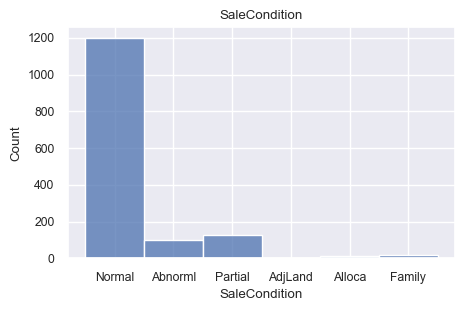

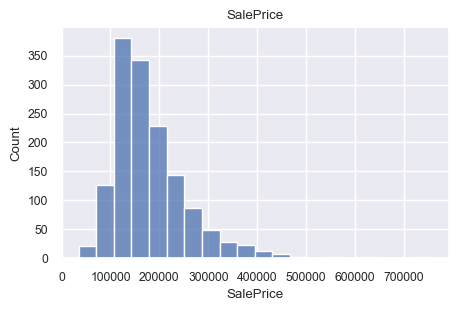

In [88]:
# histogram:

num_var = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

# loop through the list the see the relationshop with 'SalePrice'

for col in num_var:
       f, ax = plt.subplots(figsize=(5,3))
       # sns.stripplot(x=train['SalePrice'], y= train[col], data=train)
       sns.histplot(x=col, data=train, bins=20)
       plt.title(col)
       plt.show()
       
       print('\n')

In [89]:
# correlations:
# use correlations to understand the relationship of each var and 'SalePrice

matrix_corr = train.corr()
matrix_corr['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

- Correlation efficient from 0.7 to 0.9 can be seen as "high correlation"; from 0.4 to 0.6 is seen as "moderate correlation"

- Based on the rule of thumb, "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF" can take into consideration

- However, "YearBuilt" is an important attribute for house-buying in real life. Although the correlation is not high, it seems worth looking into the attribute

<AxesSubplot:>

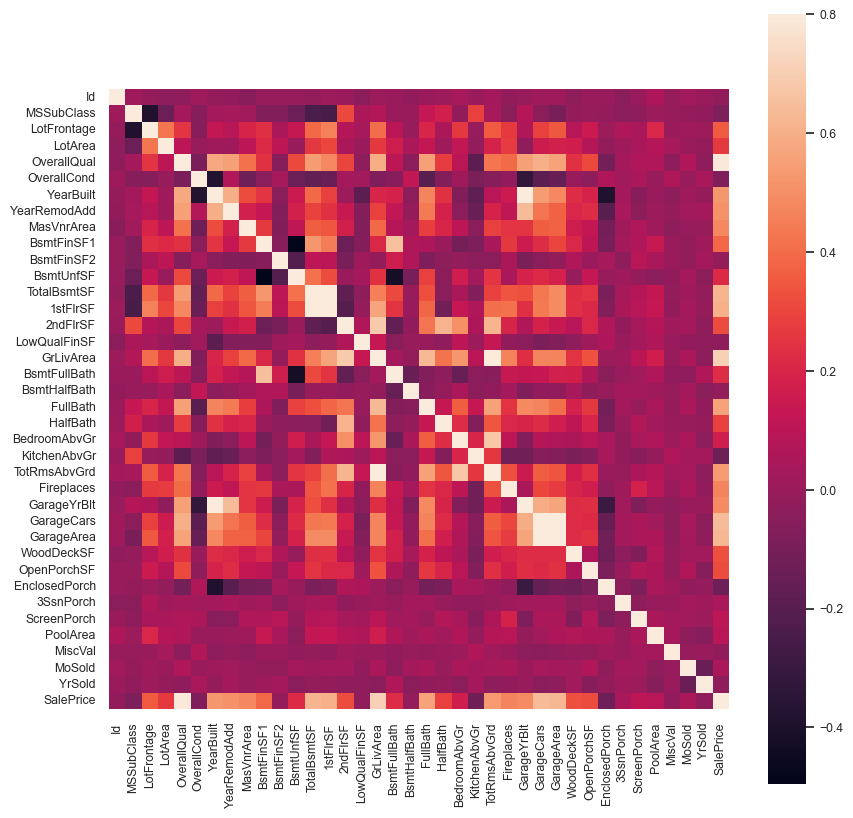

In [90]:
# correlation matrix with heatmap

train_corr = train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_corr, vmax=.8, square=True)

- Heatmap again shows "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF" have stronger correlations with "SalePrice" 

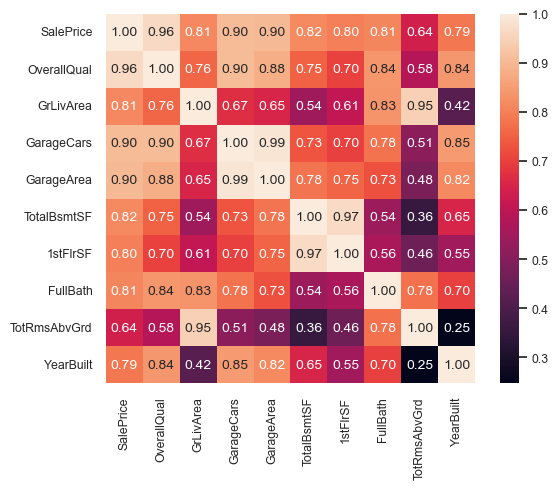

In [91]:
# look into "SalePrice" with other attributes

k = 10 # 10 attributes
cols = train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm_values = np.corrcoef(train_corr[cols].values.T) # .T: transpose index and columns
sns.set(font_scale=0.8)
hm = sns.heatmap(cm_values, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- Heatmap shows the top 10 attritbute with "Saleprice"
- However, "GarageCars" and "GarageArea" are similar, so keep "GarageCars" as the score is higher. Keep "TotalBsmtSF" as it's similar to "1stFlrSF".
- "YearBuilt" is showing strong correlation with "Saleprice" here as well
- Thus, we have 5 attributes to explore now

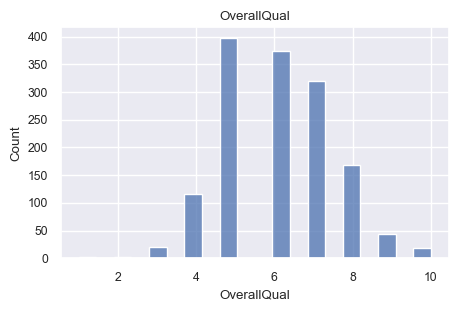

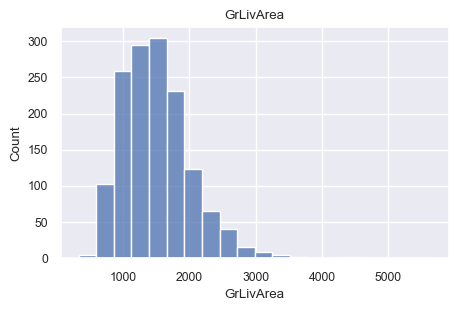

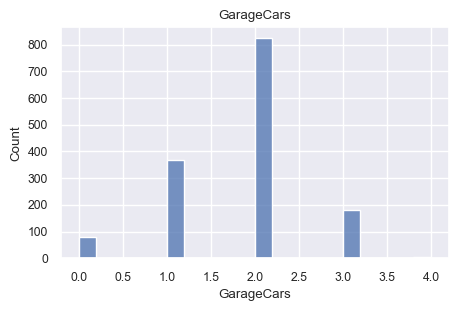

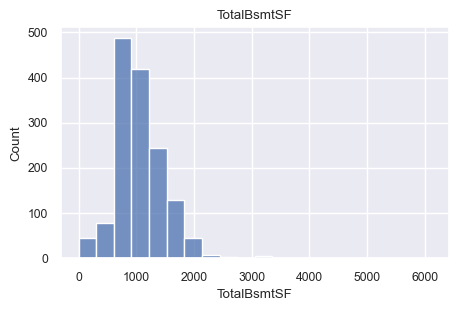

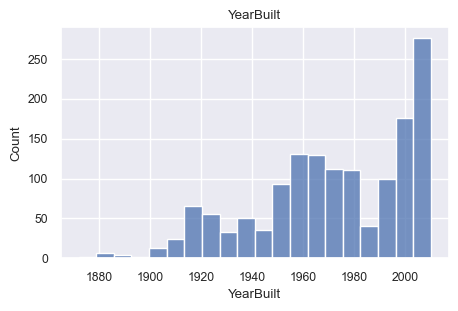

In [92]:
# plot the attributes again
# histogram:

var = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "YearBuilt"]

# loop through the list the see the relationshop with 'SalePrice'

for col in var:
       f, ax = plt.subplots(figsize=(5,3))
       # sns.stripplot(x=train['SalePrice'], y= train[col], data=train)
       sns.histplot(x=col, data=train, bins=20)
       plt.title(col)
       plt.show()
       
       print('\n')

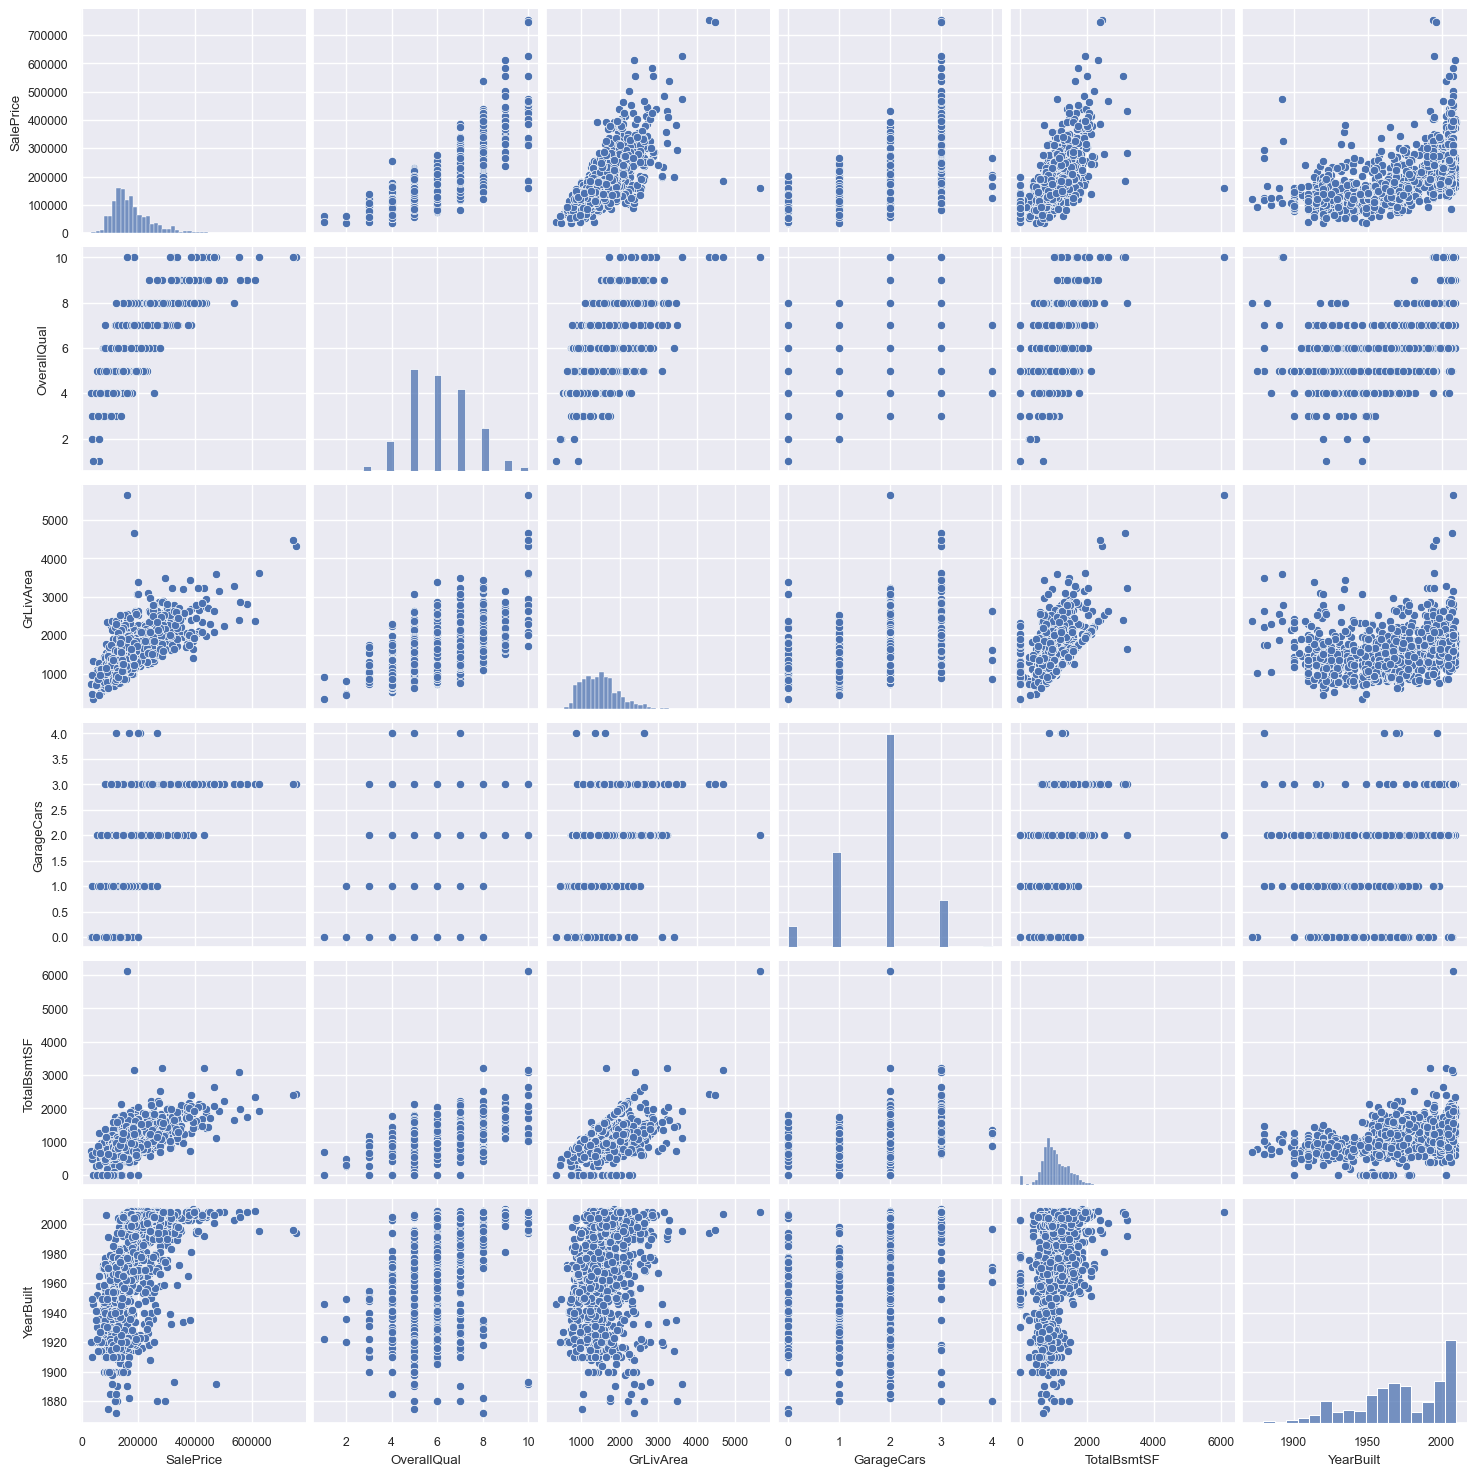

In [93]:
# scatter plot

var = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "YearBuilt"]

sns.pairplot(train[var], size = 2.5)
plt.show()

## Check Missing Data

In [94]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False) 
# .sum(): count how many flase; .count(): count how many rows
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


- if missing data is above 15%, we should consider removing them
- some attributes have many outliers, so it's okay to remove them

## Remove Missing Data

In [95]:
train = train.drop((missing[missing['Total'] > 1]).index, 1)

In [96]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [97]:
train.isnull().sum().max()

0

## Data Standardization
- outliers might affect the result
- convert data values to have mean of 0 and a standard deviation of 1

In [98]:
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:, np.newaxis])

low = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print(low)
print(high)

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


- Low range values are similar and not too far from 0
- High range values are far from 0 and the 7.something values are really out of range

## Bivariate Analysis

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

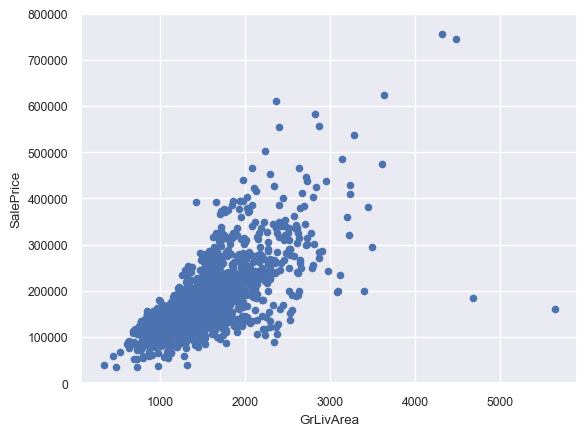

In [99]:
train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

In [100]:
# remove the outliers in 'GrLivArea'

train.sort_values(by='GrLivArea', ascending=False)[:2] # found id 1299 and 524 are the outliers
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

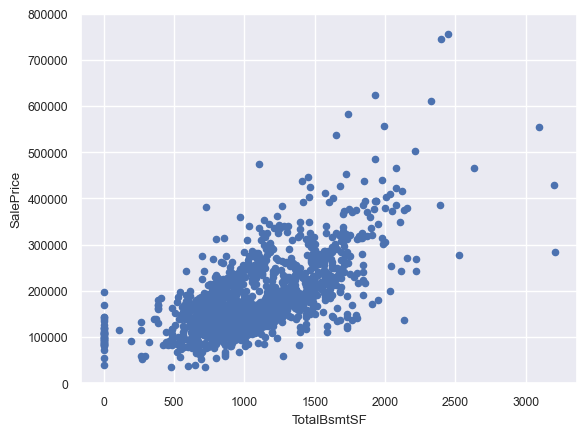

In [101]:
train.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

## Normality

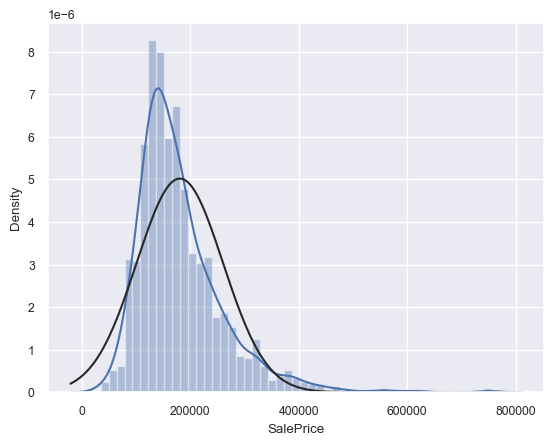

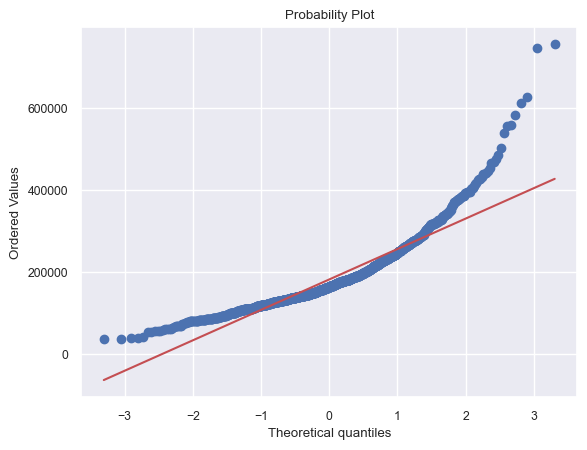

In [105]:
from scipy.stats import norm
from scipy import stats

sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Finding:
- the distribution is not normal
- transformations can help
- log transformations can help positive skewness

In [106]:
# apply log transformation
train['SalePrice'] = np.log(train['SalePrice'])

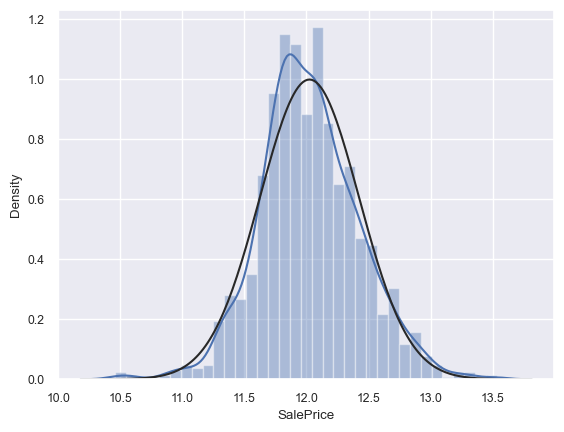

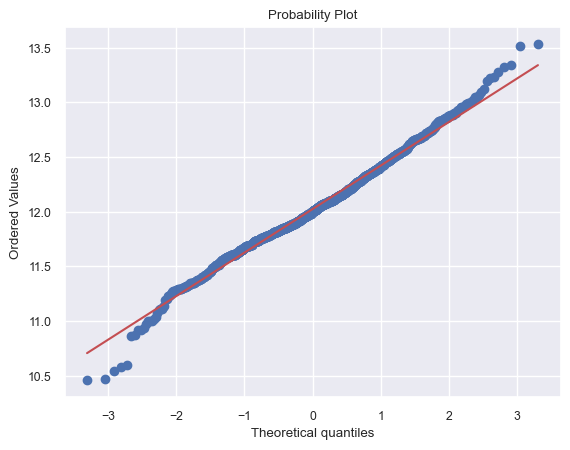

In [107]:
# plot again

sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

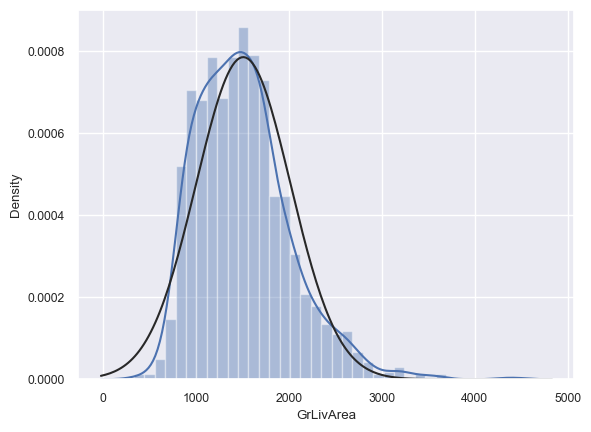

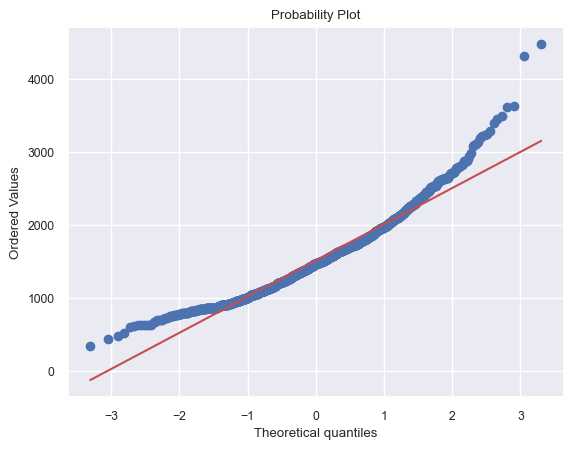

In [108]:
# Check 'GrLivArea'

sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [109]:
# log transformations for 'GrLivArea'

train['GrLivArea'] = np.log(train['GrLivArea'])

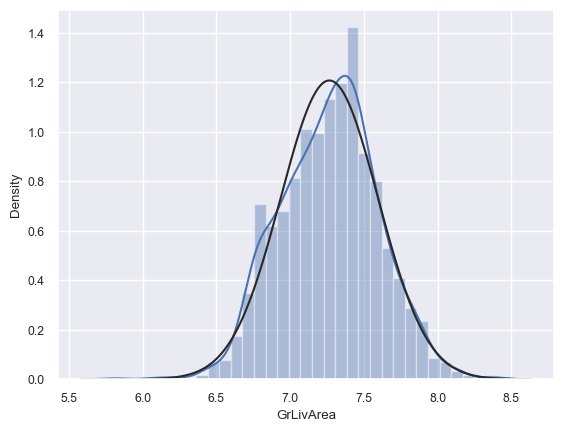

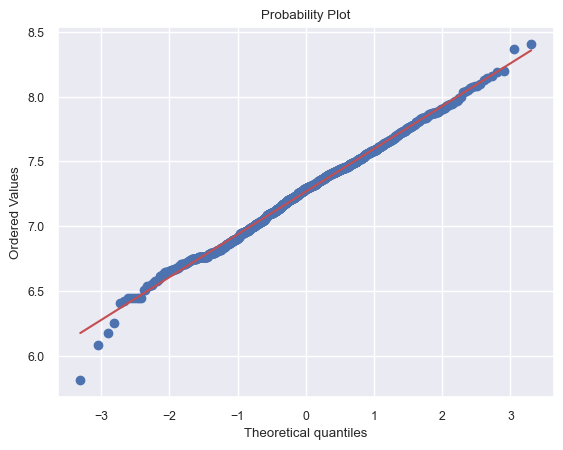

In [111]:
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

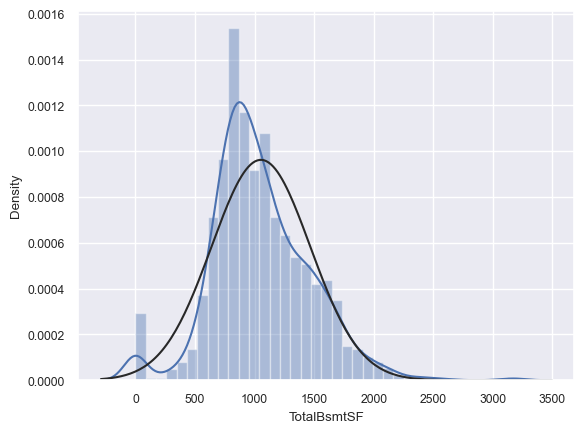

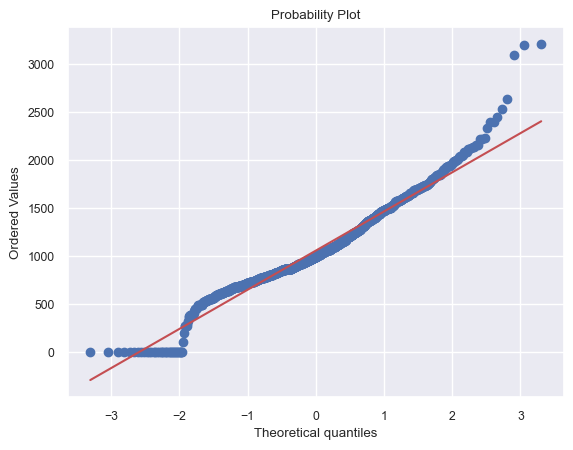

In [113]:
# check 'TotalBsmtSF'

sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

the issue of 'TotalBsmtSF'
- there is skewness
- many numbers are under 0
- value zero cannot apply log transformations

In [125]:
# transform the data before applyomg log transform
# create a series to have same index as 'TotalBsmSF'

train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0

# if 'TotalBsmtSF' is greater than 0, 'HasBsmt' will be 1
train.loc[train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [127]:
# when 'HasBsmt' = 1, consider 'TotalBsmtSF' (get ride of negatives)
train.loc[train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

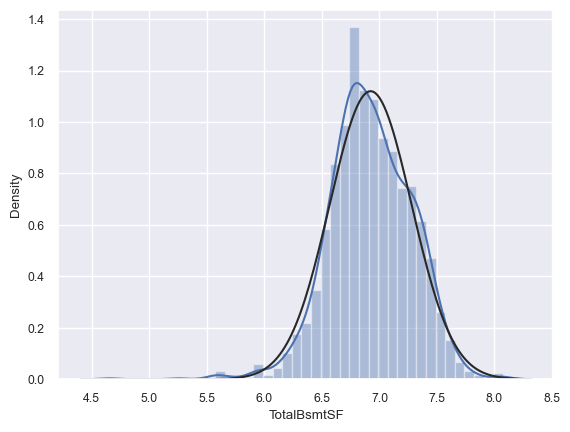

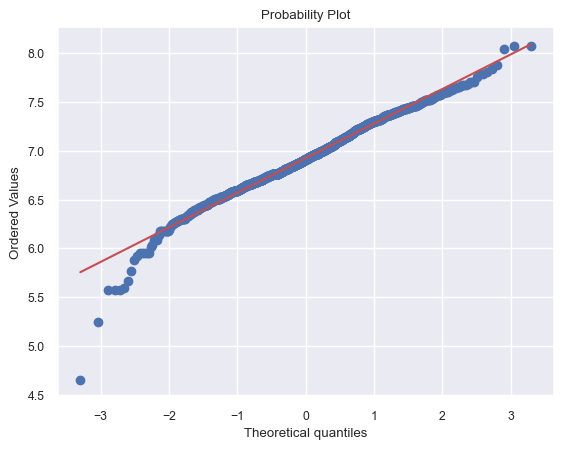

In [129]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Test Homoscedasticity

- The best approach to test homoscedasticity for two metric variables is graphically
- Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution)

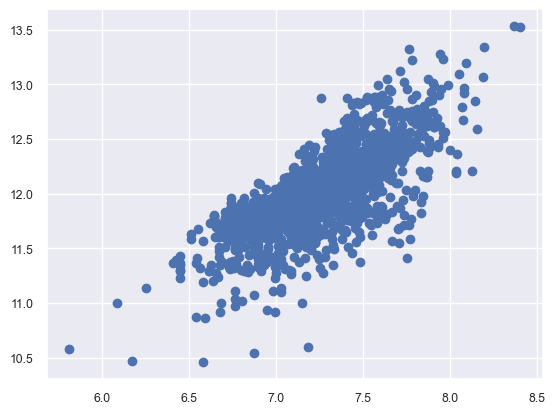

In [130]:
# scatter plot

plt.scatter(train['GrLivArea'], train['SalePrice'])

- compared to previous plot, the previous one is conic but not this one, meaning the data is normal as we have done log transformations
- we also have solved the homoscedasticity problem

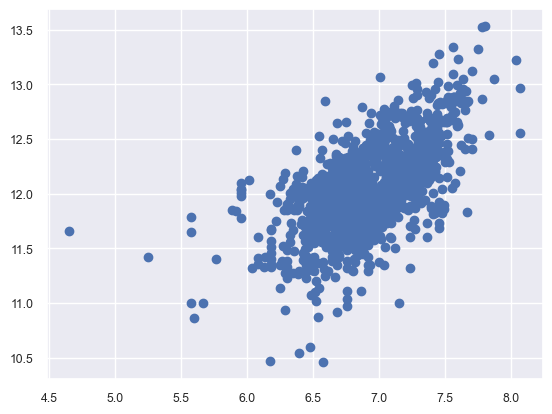

In [133]:
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice'])

- 'SalePrice' exhibit equal levels of varian across the range of 'TotalBsmtSF'

## Multiple Linear Regression

In [147]:
# only consider 'TotalBsmtSF' > 0
train_final = train[train['TotalBsmtSF']>0]

In [140]:
var = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "YearBuilt"]

X = train_final[var]
y= train_final['SalePrice']

In [143]:
# Fit the regression model

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [144]:
mlr.predict(X)

array([12.24634354, 12.03602636, 12.27497606, ..., 12.23420621,
       11.71261044, 11.84191443])

In [146]:
# check the value of R-squared, the intercept, and the coefficients

# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8379001232963228
Intercept:  2.44042753181205
Coefficients:


[('OverallQual', 0.09828973915856005),
 ('GrLivArea', 0.42792306712795547),
 ('GarageCars', 0.06843602111009275),
 ('TotalBsmtSF', 0.20053159221359815),
 ('YearBuilt', 0.0022173772102075384)]

- ~83% of the 'SalePrice' can be explained by this model, which is pretty good!

## Train and test subsets with (MLR) multiple linear regression

In [152]:
# Split the data in 'train' (80%) and 'test' (25%) sets.

import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,
                                                                            y,
                                                                            test_size = 0.25,
                                                                            random_state = 42)

In [154]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.

import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1111.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:40:40   Log-Likelihood:                 464.87
No. Observations:                1065   AIC:                            -917.7
Df Residuals:                    1059   BIC:                            -887.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3685      0.452      5.242      

In [155]:
# run the regression model

mlr = LinearRegression()  

# fit the model with the training data set
mlr.fit(X_train, Y_train)  

LinearRegression()

In [157]:
# call the predictions
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [12.64371104 11.8510397  11.88860362 12.65593814 12.63353777 12.29584967
 11.64491559 12.35490984 12.09576434 12.01373853 12.73762254 11.71619045
 11.6636888  12.52628104 12.50875309 11.29713036 11.36239245 12.61535506
 11.47004351 11.87525237 12.04020176 12.31772136 11.97816305 12.16099695
 12.40323468 12.35772449 11.67157148 11.80491704 12.17129646 12.58935572
 11.91306674 12.28412508 11.53482106 11.93211228 12.11068699 11.82851886
 12.22553898 11.89600306 11.65444702 12.52849639 11.5496253  11.97600768
 12.02955345 12.87123901 11.70872861 12.04181141 12.13043967 12.25907774
 11.45061982 12.03616015 11.91913274 12.05724155 12.23579042 11.89484183
 12.35966494 12.12350426 12.95457969 12.43517188 11.56808417 11.86802662
 12.22868616 12.36838848 12.45754194 11.70451459 12.45304483 11.50809778
 11.3314188  12.0805064  12.10034504 11.84034022 12.38664125 12.41284431
 11.67309708 12.27187501 11.86970863 11.70972901 11.93205817 11.99987498
 11.85562679 11.57850172 1

In [158]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

82.80382620822455


- ~83% of the 'SalePrice' can be explained by this model

## Evaluate the MLR Model

In [160]:
# call the ‘metrics.mean_absolute_error’ function.  

from sklearn import metrics
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 0.11883924359655228
Mean Square Error (Final): 0.027716578582894693


- MAE (Mean Absolute Error) is the average absolute error between actual and predicted values
- The closer MAE is to 0, the more accurate the model is
- RMSE is the square root of the variance of the residuals
- Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit
- Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response

Conclustion: as MAE and RMSE is pretty low, we could say the prediction of this model is quite accurate. Of course, we could compare with other models to see if we could lower the values!